<a href="https://www.kaggle.com/code/nandhinipremkumar/statistical-and-nlp-analysis?scriptVersionId=223736263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv


In [2]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
#This library os used for statistical graphics. It builds on top of matplotlib and integrates closely with pandas DS
import seaborn as sns
#This library os used for probabilistic distributions and statistical operations.
import scipy.stats as stats
from scipy.stats import spearmanr,chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
file_path = '/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [4]:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)


In [5]:

# Set the display options to show more rows and columns
pd.set_option('display.max_columns', None)  # No column limit
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.max_seq_item', None)  # No item truncation for sequences (like lists)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_')

#To compute the total number of missing values in the data frame.
print(df.isnull().sum())

Agent_Name                 0
Rating                     0
Review_Text                0
Delivery_Time__min_        0
Location                   0
Order_Type                 0
Customer_Feedback_Type     0
Price_Range                0
Discount_Applied           0
Product_Availability       0
Customer_Service_Rating    0
Order_Accuracy             0
dtype: int64


In [6]:

""".................................................Descriptive and Exploratory Data Analysis........................................"""
# Exploratory Data Analysis (EDA) is a crucial step in data science and machine learning that involves analyzing datasets.
# EDA is to summarize their main characteristics and uncover patterns, anomalies, or relationships.

#Returns descriptive statistics about the data like mean, minimum, maximum, standard deviation, etc.
print("Descriptive Statistics of the Data Frame:","\n",df.describe())

#info() is used to generate the summary of the Data Frame, this will include info about columns with their names,
#their datatypes, and missing values.
print("Generate the summary of the Data Frame:")
print(df.info())

#df.shape() display Total no of rows and columns data frame
print("Total no of rows and columns Data Frame:",df.shape)

# Returns unique values for each column and print them as readable lists
unique_values = df[['Agent_Name', 'Location', 'Order_Type']].apply(lambda x: x.unique().tolist())

# Convert to a dictionary and print the entire result
unique_values_dict = unique_values.to_dict()
for column, values in unique_values_dict.items():
    print(f"Unique values for {column}: {values}")

#Returns the number of unique values of all columns
num_unique_values = df[['Agent_Name', 'Location', 'Order_Type']].nunique()
print('Number of unique values for each column:',"\n",num_unique_values)

# the memory usage of each column in bytes.
print("Memory Usage of each column in bytes:","\n",df.memory_usage(index=True, deep=True))

#Calculating  Descriptive Statistics for Numerical Columns
summary_stats = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].describe()
mode_values = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].mode().iloc[0]
range_values = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].max() - df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].min()

# Calculating Frequency Distribution for  categorical columns
order_type_freq = df['Order_Type'].value_counts()
location_freq = df['Location'].value_counts()
product_availability_freq = df['Product_Availability'].value_counts()

# Return mode and range of Numerical columns
print("\nMode for Numerical Columns:\n", mode_values)
print("\nRange for Numerical Columns:\n", range_values)

# Return Frequency Distribution of categorical  columns
print("\nFrequency Distribution for 'Order Type':\n", order_type_freq)
print("\nFrequency Distribution for 'Location':\n", location_freq)
print("\nFrequency Distribution for 'Product Availability':\n", product_availability_freq)

Descriptive Statistics of the Data Frame: 
            Rating  Delivery_Time__min_  Customer_Service_Rating
count  5000.00000          5000.000000              5000.000000
mean      3.00290            34.962400                 2.972000
std       1.15214            14.789656                 1.409969
min       1.00000            10.000000                 1.000000
25%       2.00000            22.000000                 2.000000
50%       3.00000            35.000000                 3.000000
75%       4.00000            48.000000                 4.000000
max       5.00000            60.000000                 5.000000
Generate the summary of the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent_Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review_Text 

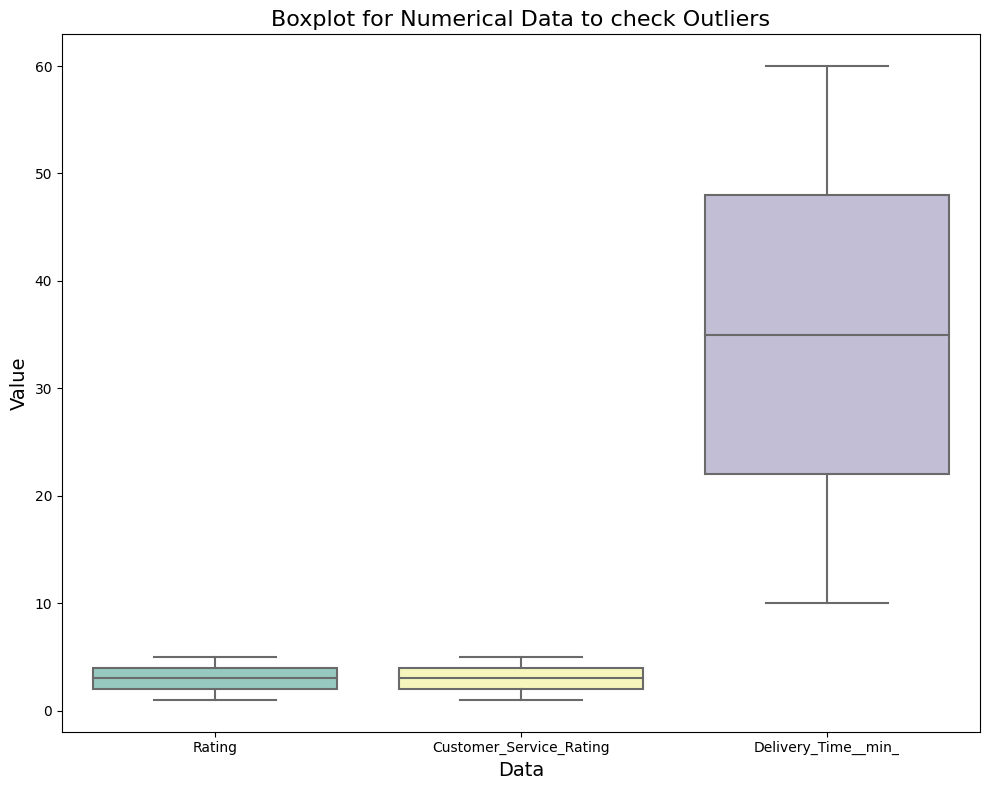

In [7]:

""".................................................Data Visualization..............................................."""

#1. Checking Outliers by boxplot (Numerical Data)
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']], palette='Set3')
#Labeling and aesthetics
plt.title('Boxplot for Numerical Data to check Outliers', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



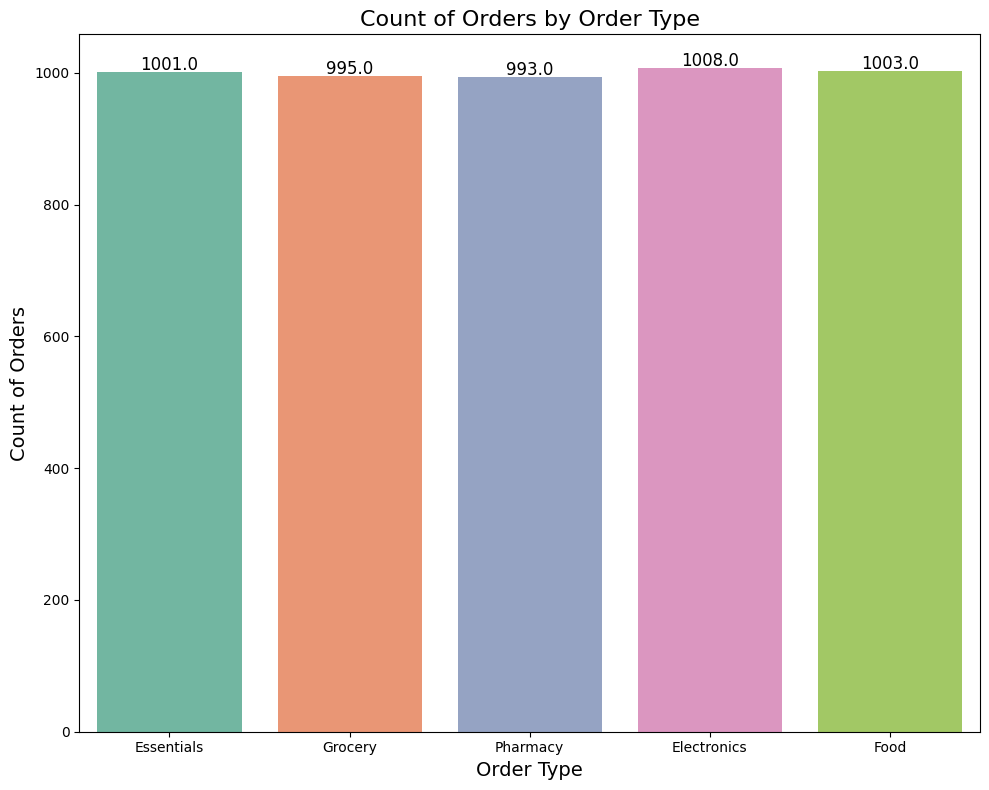

In [8]:
#2. Plotting Frequency Distribution for Order Type with count labels
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Order_Type', data=df, palette='Set2')
# Labeling and aesthetics
plt.title('Count of Orders by Order Type', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()




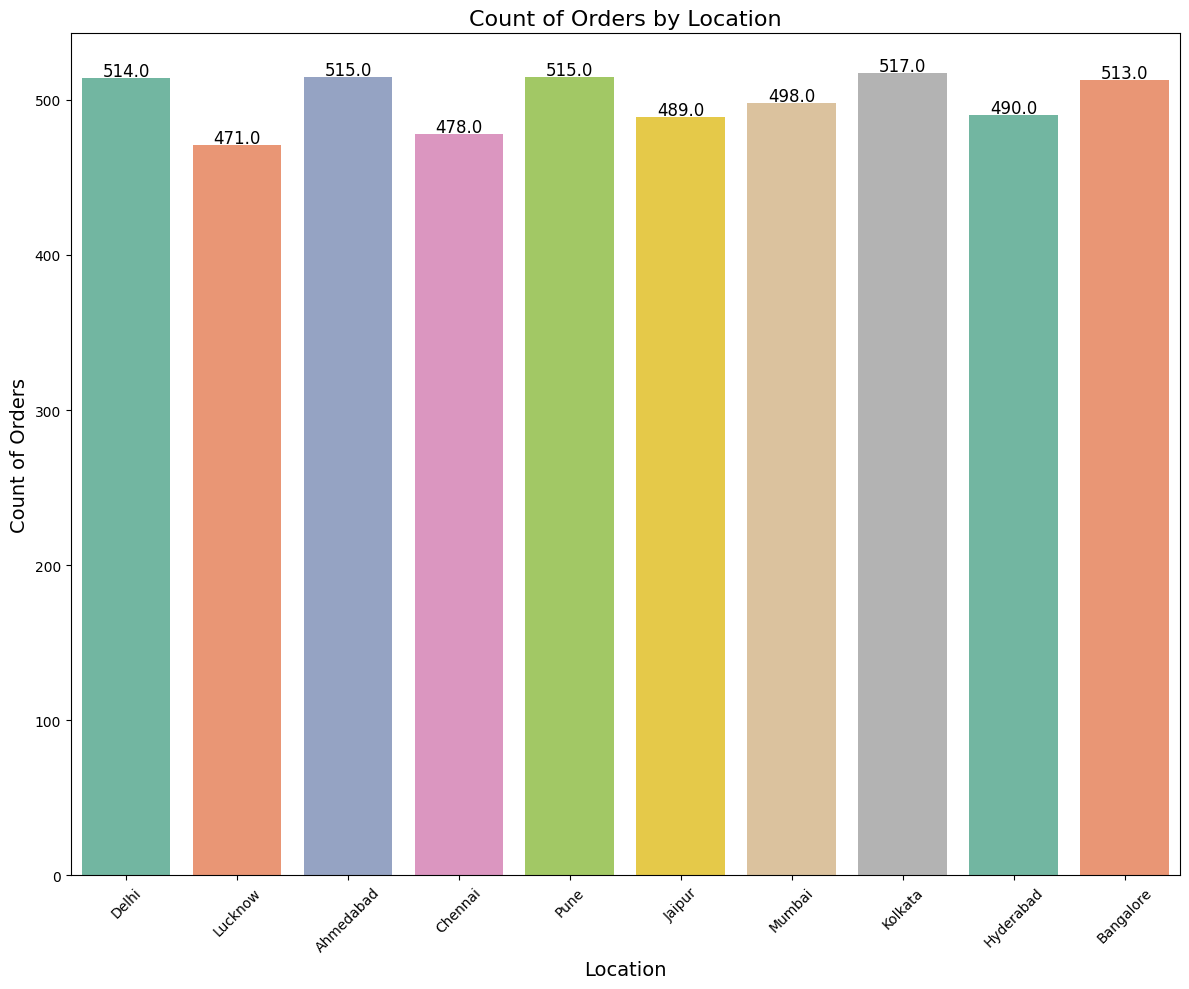

In [9]:
# 3. Plotting Frequency Distribution for Location with count labels
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Location', data=df, palette='Set2')
# Labeling and aesthetics
plt.title('Count of Orders by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)

# Display count over bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


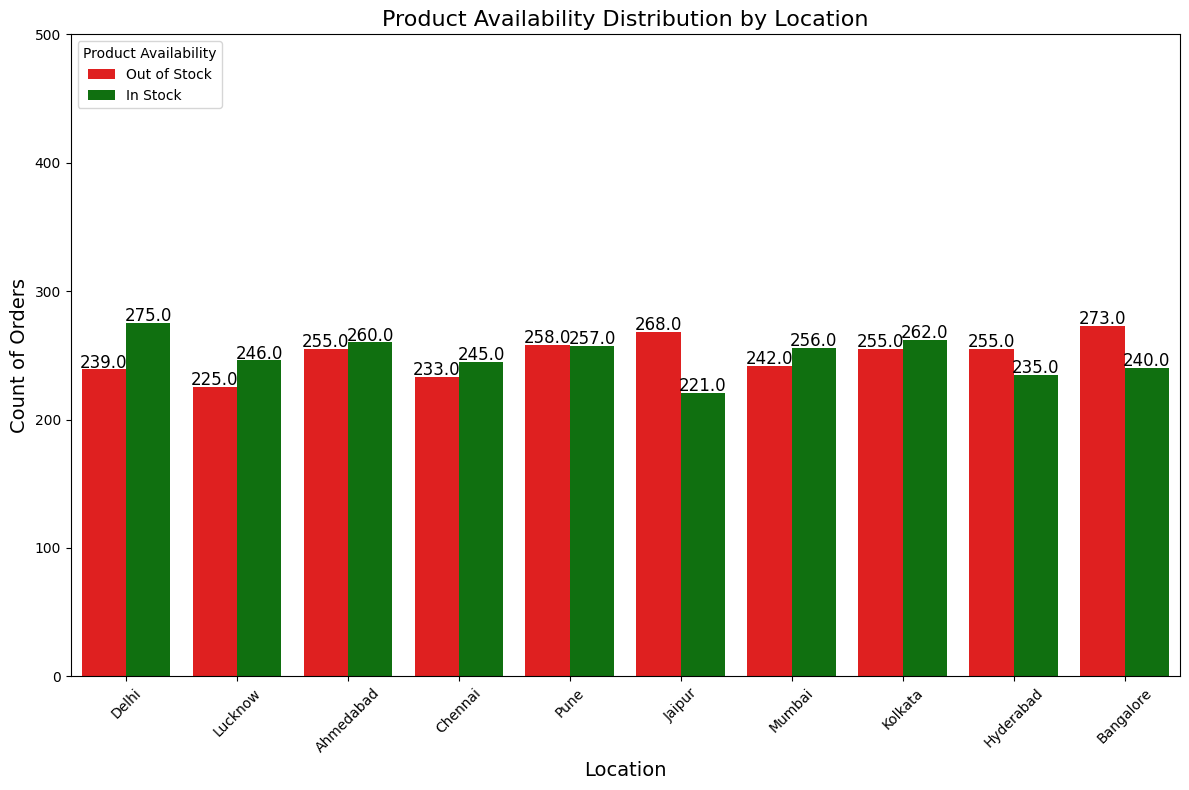

In [10]:

#4. Plotting Frequency Distribution for Product Availability by Location with count labels
plt.figure(figsize=(12, 8))
color_map = {'In Stock': 'green', 'Out of Stock': 'red'}
ax = sns.countplot(x='Location', hue='Product_Availability', data=df, palette=color_map)
#Labeling and aesthetics
plt.title('Product Availability Distribution by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_ylim(0, 500)
plt.legend(title="Product Availability", loc='upper left')
plt.tight_layout()
plt.show()



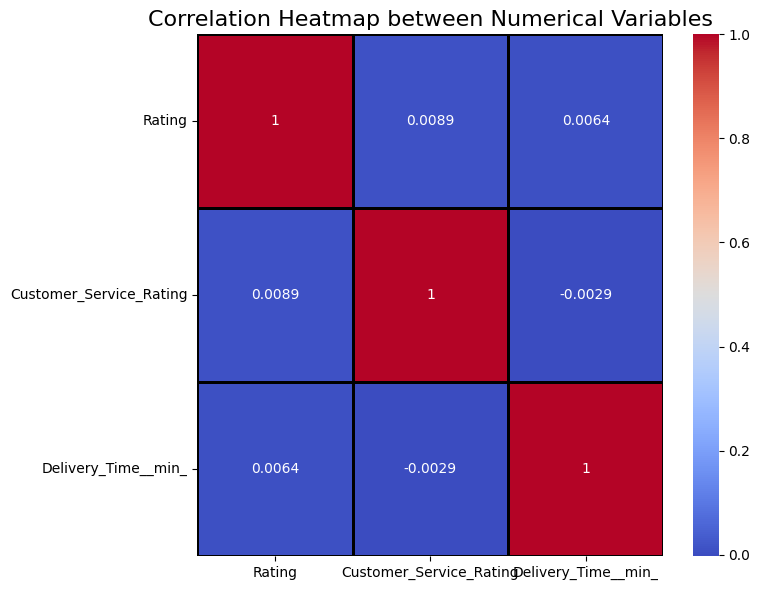

In [11]:
#5. Visualizing the correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
# #Labeling and aesthetics
plt.title('Correlation Heatmap between Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()



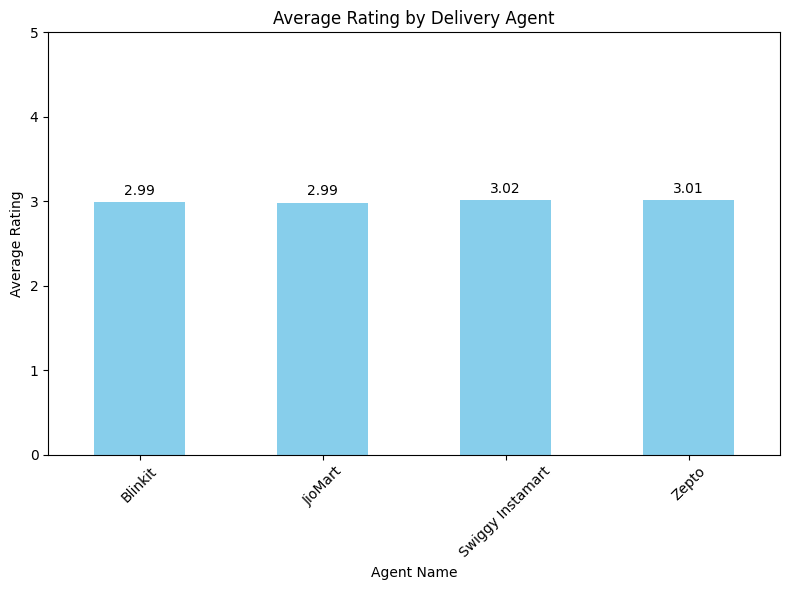

In [12]:
#6. Average Rating by Agent

# Calculate the average rating by agent
average_rating = df.groupby('Agent_Name')['Rating'].mean()
plt.figure(figsize=(8, 6))
ax = average_rating.plot(kind='bar', color='skyblue')

#Labeling and aesthetics
for i, v in enumerate(average_rating):
    ax.text(i, v + 0.05, round(v, 2), ha='center', va='bottom')
plt.ylim(0, 5)
plt.title('Average Rating by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



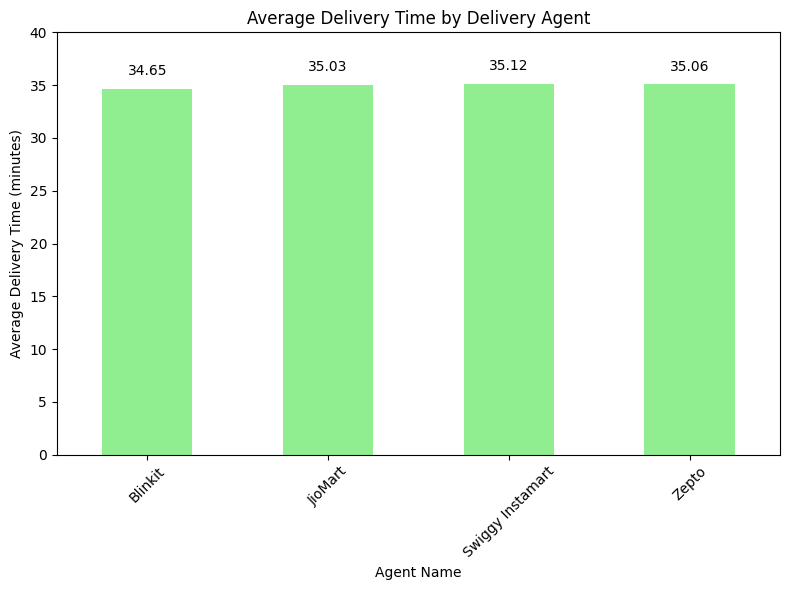

In [13]:
#7. Average Delivery Time by Agent

# Calculate the average delivery time by agent
average_delivery_time = df.groupby('Agent_Name')['Delivery_Time__min_'].mean()
plt.figure(figsize=(8, 6))
ax = average_delivery_time.plot(kind='bar', color='lightgreen')

#Labeling and aesthetics
for i, v in enumerate(average_delivery_time):
    ax.text(i, v + 1, round(v, 2), ha='center', va='bottom')
plt.title('Average Delivery Time by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.ylim(0, 40)
plt.tight_layout()
plt.show()


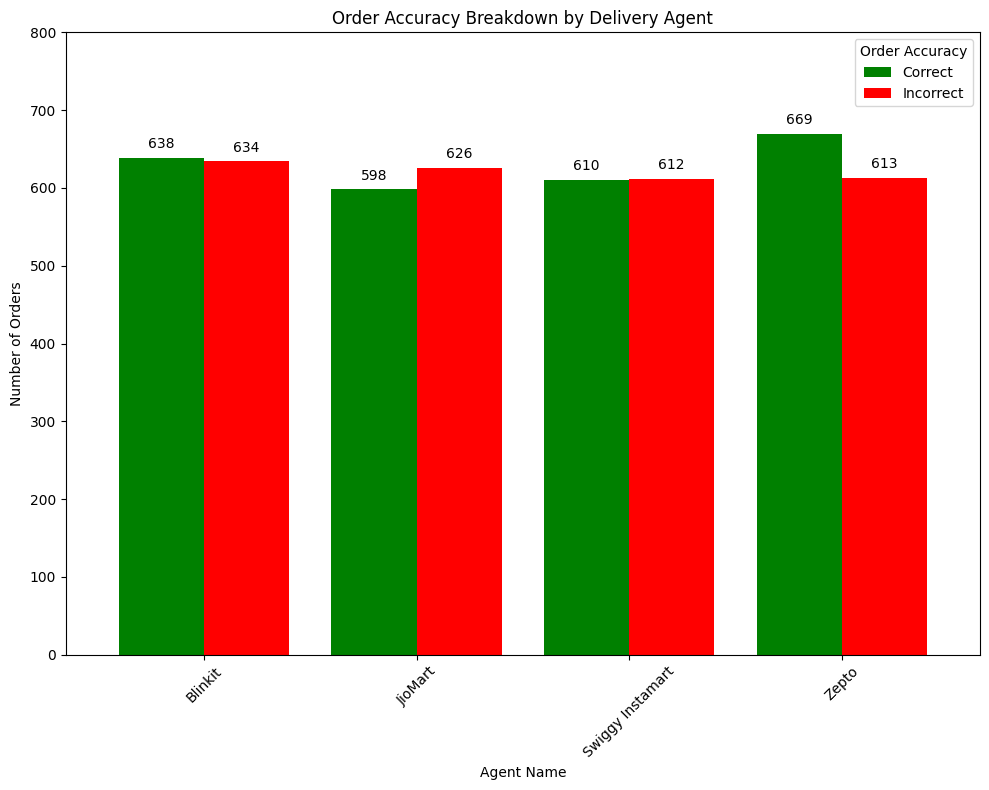

In [14]:

#8.Order Accuracy Breakdown Agent wise

# Count the number of correct and incorrect orders for each agent and Plotting the order accuracy breakdown by agent
order_accuracy = df.groupby(['Agent_Name', 'Order_Accuracy']).size().unstack(fill_value=0)
ax = order_accuracy.plot(kind='bar', figsize=(10, 8), color=['green', 'red'], width=0.8)
#Labeling and aesthetics
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),  # Text position
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Order Accuracy Breakdown by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.ylim(0, 800)
plt.legend(title="Order Accuracy", loc='upper right')
plt.tight_layout()
plt.show()

Null Hypothesis (H0): There is a significant relationship between Order Type and Product Availability..
Alternative Hypothesis (H1): There is no significant relationship between Order Type and Product Availability.
Chi-Square Statistic: 2.277905917901016
P-value: 0.6847944757318052
Fail to reject the null hypothesis: There is no significant relationship between Order Type and Product Availability.


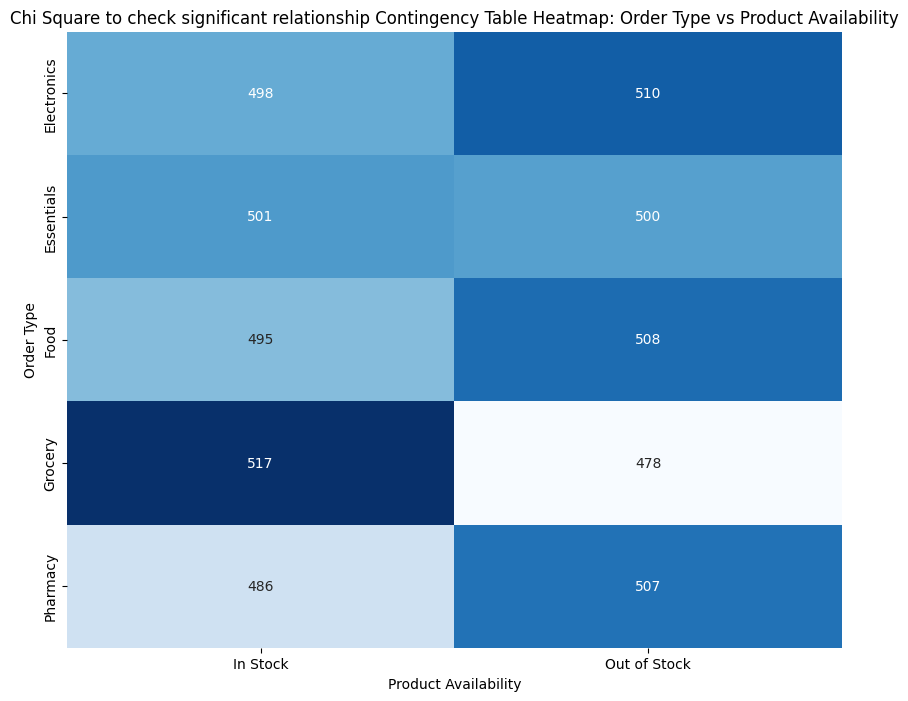

In [15]:
"""......................................Inferential Data Analysis..................................................."""

#1.Chi-Square Test for Independence to test whether there is an association between Order Type and Product Availability

# Create a contingency table for Order Type and Product Availability and Perform the Chi-Square Test
contingency_table = pd.crosstab(df['Order_Type'], df['Product_Availability'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display result
print("Null Hypothesis (H0): There is a significant relationship between Order Type and Product Availability..")
print("Alternative Hypothesis (H1): There is no significant relationship between Order Type and Product Availability.")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Order Type and Product Availability.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Order Type and Product Availability.")

# Plot the heatmap for the contingency table
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Chi Square to check significant relationship Contingency Table Heatmap: Order Type vs Product Availability')
plt.xlabel('Product Availability')
plt.ylabel('Order Type')
plt.show()


Null Hypothesis (H0): There is a significant difference between the Customer Service Ratings across Order Types.
Alternative Hypothesis (H1): There is no significant difference between the Customer Service Ratings across Order Types.
Kruskal-Wallis H-test statistic: 1.1656302785848227
P-value: 0.8837242990170768
Fail to reject the null hypothesis: There is no significant difference between the Customer Service Ratings across Order Types.


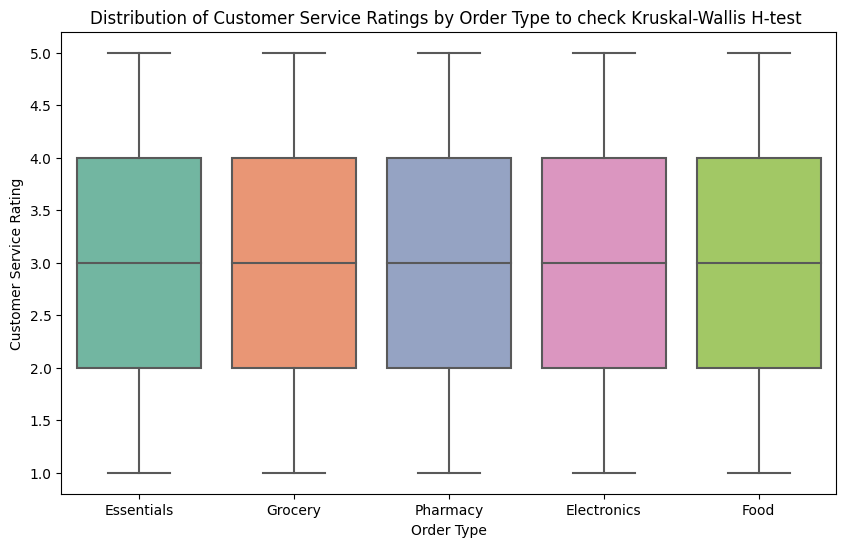

In [16]:

#2.Non-Parametric Kruskal-Wallis H-test to check significant difference between the Customer Service Ratings across Order Types.

#Group the data by Order Type and extract the Customer Service Ratings and Perform the Kruskal-Wallis H-test
order_types = df['Order_Type'].unique()
grouped_data = [df[df['Order_Type'] == order_type]['Customer_Service_Rating'] for order_type in order_types]
kruskal_stat, p_value = stats.kruskal(*grouped_data)

#Display Kruskal-Wallis Test Results
print("Null Hypothesis (H0): There is a significant difference between the Customer Service Ratings across Order Types.")
print("Alternative Hypothesis (H1): There is no significant difference between the Customer Service Ratings across Order Types.")
print(f"Kruskal-Wallis H-test statistic: {kruskal_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the Customer Service Ratings across Order Types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the Customer Service Ratings across Order Types.")


# Create a boxplot to visualize the distribution of Customer Service Ratings across Order Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Type', y='Customer_Service_Rating', data=df, palette='Set2')
plt.title('Distribution of Customer Service Ratings by Order Type to check Kruskal-Wallis H-test ')
plt.xlabel('Order Type')
plt.ylabel('Customer Service Rating')
plt.show()




Null Hypothesis (H₀): The null hypothesis states that there is no correlation between Discount Applied and Customer Feedback Type.
Alternative Hypothesis (H₁): The alternative hypothesis states that there is a correlation between Discount Applied and Customer Feedback Type.

The correlation between Discount Applied and Customer Feedback Type is: -0.01

Interpretation: There is a negative correlation between Discount Applied and Customer Feedback Type. This means that discounts might slightly increase negative feedback, but the relationship is weak.


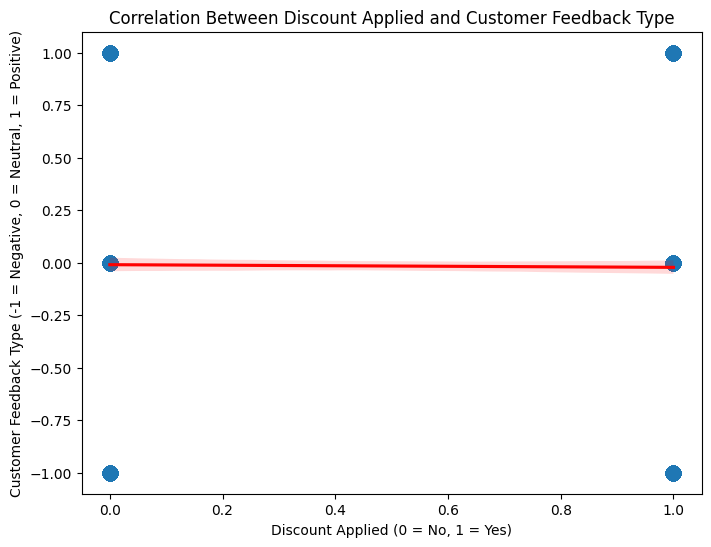

In [17]:
#3.Correlation between Discount Applied and Customer Feedback Type.

# Map the values
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})
df['Customer_Feedback_Type'] = df['Customer_Feedback_Type'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

# Calculate the correlation
print("Null Hypothesis (H₀): The null hypothesis states that there is no correlation between Discount Applied and Customer Feedback Type.")
print("Alternative Hypothesis (H₁): The alternative hypothesis states that there is a correlation between Discount Applied and Customer Feedback Type.")
correlation = df['Discount_Applied'].corr(df['Customer_Feedback_Type'])
print(f"\nThe correlation between Discount Applied and Customer Feedback Type is: {correlation:.2f}")

# Interpretation of the results
if correlation > 0:
    print("\nInterpretation: There is a positive correlation between Discount Applied and Customer Feedback Type. This means that discounts might slightly increase positive feedback.")
elif correlation < 0:
    print("\nInterpretation: There is a negative correlation between Discount Applied and Customer Feedback Type. This means that discounts might slightly increase negative feedback, but the relationship is weak.")
else:
    print("\nInterpretation: There is no correlation between Discount Applied and Customer Feedback Type. Discounts have no noticeable effect on customer feedback.")

# Plotting the scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Discount_Applied', y='Customer_Feedback_Type', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Correlation Between Discount Applied and Customer Feedback Type')
plt.xlabel('Discount Applied (0 = No, 1 = Yes)')
plt.ylabel('Customer Feedback Type (-1 = Negative, 0 = Neutral, 1 = Positive)')
plt.show()


Two-Way ANOVA Table:
                                sum_sq      df         F    PR(>F)
C(Agent_Name)                 3.907292     3.0  0.656473  0.578818
C(Location)                  41.352328     9.0  2.315900  0.013502
C(Agent_Name):C(Location)    52.151787    27.0  0.973571  0.502939
Residual                   9840.547470  4960.0       NaN       NaN

Fail to reject the null hypothesis for Agent Name: There is no significant effect of Agent Name on Customer Service Rating.
Reject the null hypothesis for Location: There is a significant effect of Location on Customer Service Rating.
Fail to reject the null hypothesis for the interaction effect: There is no significant interaction effect between Agent Name and Location.


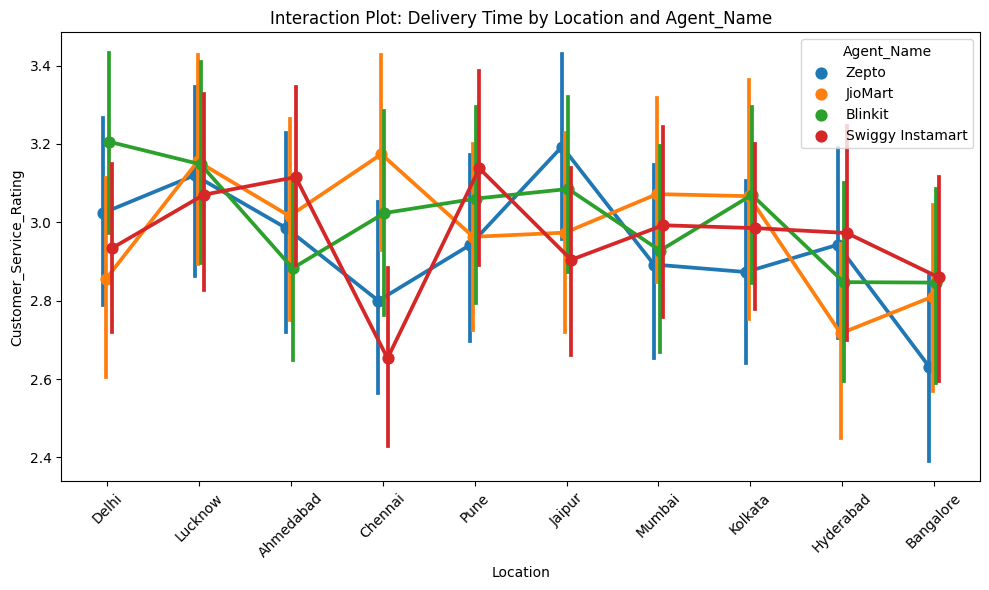

In [18]:

# 4.Two-way ANOVA to examine how both the Agent Name and Location affect Customer Service Rating, including the interaction effect.

# Fit the OLS model using the formula
formula = 'Customer_Service_Rating ~ C(Agent_Name) + C(Location) + C(Agent_Name):C(Location)'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA Table:")
print(anova_table)

# Interpretation of Results with p-values
alpha = 0.05
if anova_table["PR(>F)"]["C(Agent_Name)"] < alpha:
    print("\nReject the null hypothesis for Agent Name: There is a significant effect of Agent Name on Customer Service Rating.")
else:
    print("\nFail to reject the null hypothesis for Agent Name: There is no significant effect of Agent Name on Customer Service Rating.")

if anova_table["PR(>F)"]["C(Location)"] < alpha:
    print("Reject the null hypothesis for Location: There is a significant effect of Location on Customer Service Rating.")
else:
    print("Fail to reject the null hypothesis for Location: There is no significant effect of Location on Customer Service Rating.")

if anova_table["PR(>F)"]["C(Agent_Name):C(Location)"] < alpha:
    print("Reject the null hypothesis for the interaction effect: There is a significant interaction effect between Agent Name and Location.")
else:
    print("Fail to reject the null hypothesis for the interaction effect: There is no significant interaction effect between Agent Name and Location.")

# Interaction Plot using seaborn
plt.figure(figsize=(10, 6))
sns.pointplot(x='Location', y='Customer_Service_Rating', hue='Agent_Name', data=df, markers='o', linestyles='-', dodge=True)
plt.title('Interaction Plot: Delivery Time by Location and Agent_Name')
plt.xlabel('Location')
plt.ylabel('Customer_Service_Rating')
plt.xticks(rotation=45)
plt.legend(title="Agent_Name", loc='upper right')
plt.tight_layout()
plt.show()





Chi-Square Test for Price Range vs Location:
Chi-Square Statistic: 10.481389925168623
p-value: 0.9150557801067793
Degrees of Freedom: 18
Expected Frequencies Table: 
[[174.688  174.0096 162.1376 174.3488 166.208  165.8688 175.3664 159.7632
  168.9216 174.688 ]
 [173.04   172.368  160.608  172.704  164.64   164.304  173.712  158.256
  167.328  173.04  ]
 [167.272  166.6224 155.2544 166.9472 159.152  158.8272 167.9216 152.9808
  161.7504 167.272 ]]

Null Hypothesis (H0): There is no significant relationship between Price Range and Location.
Alternative Hypothesis (H1): There is a significant relationship between Price Range and Location.

Fail to reject the null hypothesis: There is no significant relationship between Price Range and Location.


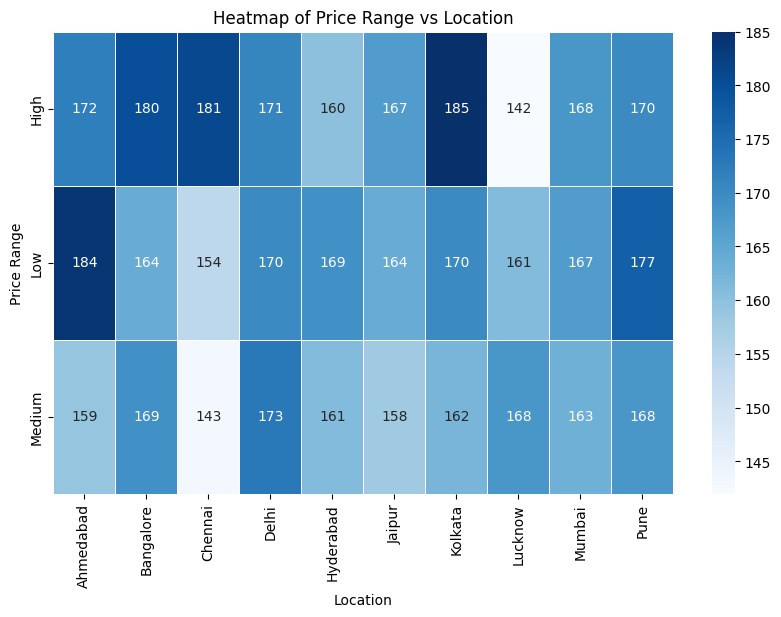

In [19]:
#5.Chi-Square Test of Independence for Price Range vs Location

contingency_table_location = pd.crosstab(df['Price_Range'], df['Location'])

# Perform Chi-Square test
chi2_stat_location, p_value_location, dof_location, expected_location = chi2_contingency(contingency_table_location)
print("\nChi-Square Test for Price Range vs Location:")
print(f"Chi-Square Statistic: {chi2_stat_location}")
print(f"p-value: {p_value_location}")
print(f"Degrees of Freedom: {dof_location}")
print(f"Expected Frequencies Table: \n{expected_location}")
print("\nNull Hypothesis (H0): There is no significant relationship between Price Range and Location.")
print("Alternative Hypothesis (H1): There is a significant relationship between Price Range and Location.")

# Interpretation of result with p-value
alpha = 0.05
if p_value_location < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between Price Range and Location.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between Price Range and Location.")

# Heatmap for the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_location, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Heatmap of Price Range vs Location')
plt.xlabel('Location')
plt.ylabel('Price Range')
plt.show()



Chi-Square Test for Price Range vs Order Type:
Chi-Square Statistic: 16.584887929417363
p-value: 0.034733866559285516
Degrees of Freedom: 8
Expected Frequencies Table: 
[[341.9136 339.5392 340.2176 337.504  336.8256]
 [338.688  336.336  337.008  334.32   333.648 ]
 [327.3984 325.1248 325.7744 323.176  322.5264]]

Null Hypothesis (H0): There is no significant relationship between Price Range and Order Type.
Alternative Hypothesis (H1): There is a significant relationship between Price Range and Order Type.

Reject the null hypothesis: There is a significant relationship between Price Range and Order Type.


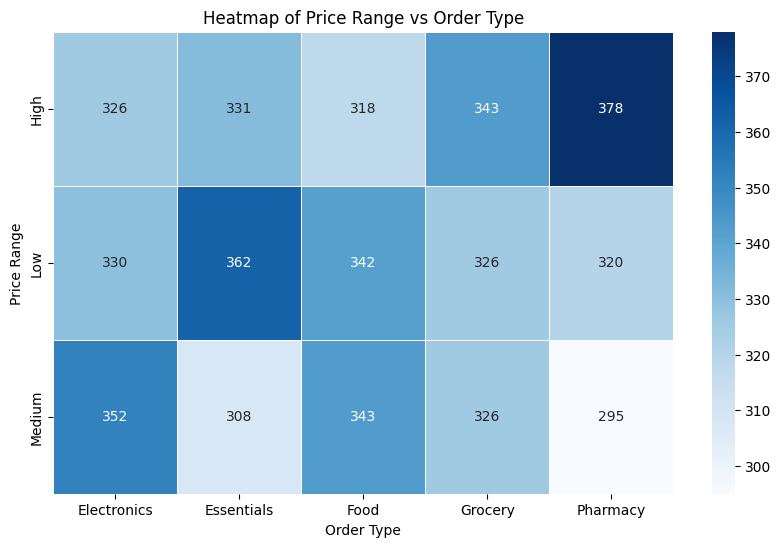

In [20]:

#6.Chi-Square Test of Independence for Price Range vs Order Type

contingency_table_order_type = pd.crosstab(df['Price_Range'], df['Order_Type'])

# Perform Chi-Square test
chi2_stat_order_type, p_value_order_type, dof_order_type, expected_order_type = chi2_contingency(contingency_table_order_type)
print("\nChi-Square Test for Price Range vs Order Type:")
print(f"Chi-Square Statistic: {chi2_stat_order_type}")
print(f"p-value: {p_value_order_type}")
print(f"Degrees of Freedom: {dof_order_type}")
print(f"Expected Frequencies Table: \n{expected_order_type}")
print("\nNull Hypothesis (H0): There is no significant relationship between Price Range and Order Type.")
print("Alternative Hypothesis (H1): There is a significant relationship between Price Range and Order Type.")

# Interpretation of p-value
if p_value_order_type < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between Price Range and Order Type.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between Price Range and Order Type.")

# Heatmap for the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_order_type, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Heatmap of Price Range vs Order Type')
plt.xlabel('Order Type')
plt.ylabel('Price Range')
plt.show()



                                 sum_sq      df         F    PR(>F)
C(Location)                1.341795e+03     9.0  0.683430  0.724676
C(Order_Type)              8.586729e+02     4.0  0.984051  0.414814
C(Location):C(Order_Type)  1.143546e+04    36.0  1.456133  0.038539
Residual                   1.079830e+06  4950.0       NaN       NaN
Fail to reject the null hypothesis for Location: There is no significant effect of Location on Delivery Time.
Fail to reject the null hypothesis for Order Type: There is no significant effect of Order Type on Delivery Time.
Reject the null hypothesis for the interaction effect: There is a significant interaction effect between Location and Order Type on Delivery Time.


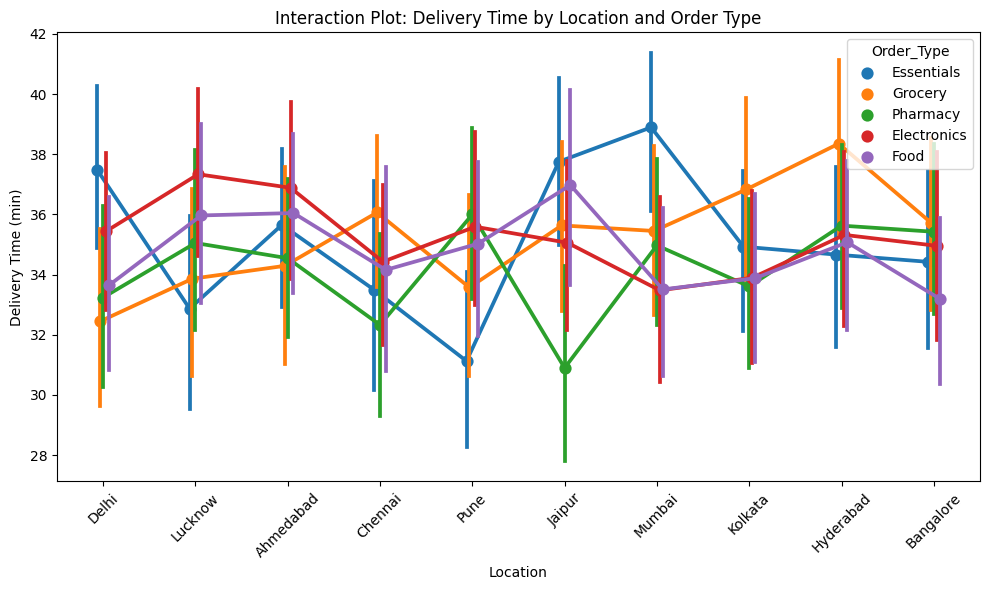

In [21]:
# 7.ANOVA to Compare Delivery Time Across Locations

# Two-Way ANOVA formula to check if Delivery Time differs by Location and Order Type
formula = 'Delivery_Time__min_ ~ C(Location) + C(Order_Type) + C(Location):C(Order_Type)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Interpretation of p-values
alpha = 0.05
if anova_table["PR(>F)"]["C(Location)"] < alpha:
    print("Reject the null hypothesis for Location: There is a significant effect of Location on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for Location: There is no significant effect of Location on Delivery Time.")

if anova_table["PR(>F)"]["C(Order_Type)"] < alpha:
    print("Reject the null hypothesis for Order Type: There is a significant effect of Order Type on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for Order Type: There is no significant effect of Order Type on Delivery Time.")

if anova_table["PR(>F)"]["C(Location):C(Order_Type)"] < alpha:
    print("Reject the null hypothesis for the interaction effect: There is a significant interaction effect between Location and Order Type on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for the interaction effect: There is no significant interaction effect between Location and Order Type on Delivery Time.")

# Interaction Plot using seaborn
plt.figure(figsize=(10, 6))
sns.pointplot(x='Location', y='Delivery_Time__min_', hue='Order_Type', data=df, markers='o', linestyles='-', dodge=True)
plt.title('Interaction Plot: Delivery Time by Location and Order Type')
plt.xlabel('Location')
plt.ylabel('Delivery Time (min)')
plt.xticks(rotation=45)
plt.legend(title="Order_Type", loc='upper right')
plt.tight_layout()
plt.show()

In [22]:
""".....................................NLP (Natural Language Processing)..........................................."""
# Importing the necessary NLP libraries
# Library for sentiment analysis
from textblob import TextBlob
# For converting text to a vector of word counts
from sklearn.feature_extraction.text import CountVectorizer
 # For calculating similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
# For converting text to TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
# For generating word clouds
from wordcloud import WordCloud
# Regular expressions for text cleaning
import re
# Stopword removal utility from NLTK
from nltk.corpus import stopwords
# General NLP library
import nltk


Customer_Feedback_Type   -1    0    1
Sentiment                            
Negative                365  318  322
Neutral                 512  508  543
Positive                850  799  783


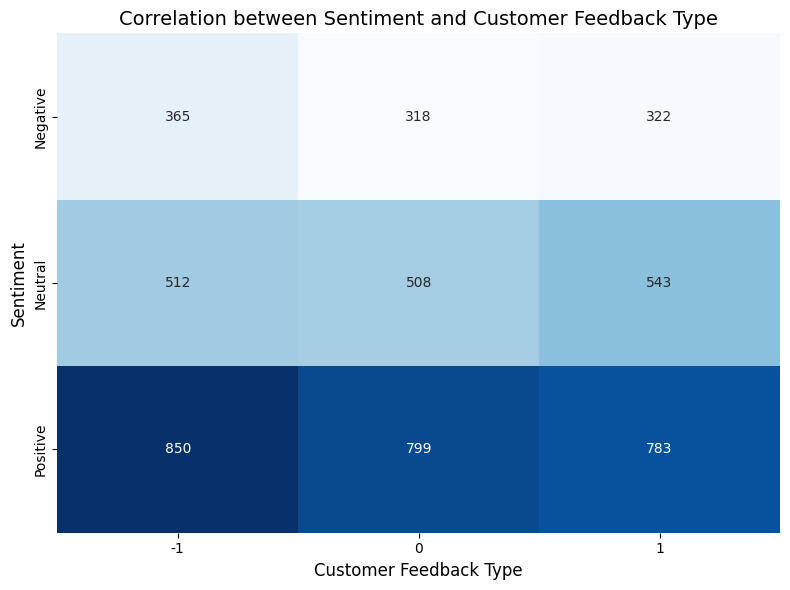


Chi-Square Test Result:
Chi2 Statistic: 4.991257969558903
p-value: 0.28819565892326143
Degrees of Freedom: 4
Expected Frequencies Table:
[[347.127  326.625  331.248 ]
 [539.8602 507.975  515.1648]
 [840.0128 790.4    801.5872]]

There is no significant correlation between Sentiment and Customer Feedback Type.


In [23]:
# 1.Sentiment analysis on the Review Text and then determine if there is a correlation between Sentiment and Customer Feedback Type,

# Function to analyze sentiment
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Review_Text' column
df['Sentiment'] = df['Review_Text'].apply(analyze_sentiment)

# Create a cross-tabulation between 'Sentiment' and 'Customer_Feedback_Type'
sentiment_feedback_crosstab = pd.crosstab(df['Sentiment'], df['Customer_Feedback_Type'])

# Display the cross-tabulation (contingency table)
print(sentiment_feedback_crosstab)

# Plot a heatmap to visualize the correlation between Sentiment and Customer Feedback Type
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_feedback_crosstab, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot with labels and title
plt.title('Correlation between Sentiment and Customer Feedback Type', fontsize=14)
plt.xlabel('Customer Feedback Type', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(sentiment_feedback_crosstab)

# Print the result of the Chi-Square Test
print("\nChi-Square Test Result:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# If p-value is less than 0.05, there is a statistically significant correlation
if p < 0.05:
    print("\nThere is a significant correlation between Sentiment and Customer Feedback Type.")
else:
    print("\nThere is no significant correlation between Sentiment and Customer Feedback Type.")


In [24]:

#2.Cosine Similarity between Sentiment and Customer Feedback Type:
# Convert the 'Sentiment' and 'Customer_Feedback_Type' columns to a format that cosine similarity can use
# We can use CountVectorizer or TF-IDF Vectorizer to convert the text into numerical data
# Convert 'Sentiment' and 'Customer_Feedback_Type' columns to strings
df['Sentiment'] = df['Sentiment'].astype(str)
df['Customer_Feedback_Type'] = df['Customer_Feedback_Type'].astype(str)

vectorizer = CountVectorizer()

# Transform 'Sentiment' and 'Customer_Feedback_Type' columns into vectors
sentiment_vector = vectorizer.fit_transform(df['Sentiment'])
feedback_vector = vectorizer.transform(df['Customer_Feedback_Type'])

# Compute Cosine Similarity between the vectors of Sentiment and Customer_Feedback_Type
cosine_sim = cosine_similarity(sentiment_vector, feedback_vector)

# Output the cosine similarity
print("Cosine Similarity between Sentiment and Customer Feedback Type:")
print(cosine_sim)

# Compute an overall cosine similarity score (mean of all individual cosine similarities)
mean_cosine_sim = np.mean(cosine_sim)
print(f"\nMean Cosine Similarity: {mean_cosine_sim}")
if mean_cosine_sim < 0.5:
    print("\nLow Similarity: A mean similarity of 0.33 suggests that there isn't a strong direct relationship between the sentiment expressed in the reviews and the type of customer feedback. In other words, the sentiment might not always align with the feedback type, and the two columns may be driven by different factors.")
else:
    print("\nHigher Similarity: The mean similarity is higher than expected, suggesting that sentiment and customer feedback might be more aligned.")

print("\nCosine Matrix: The individual similarity values show varying degrees of similarity. Some might be close to 1, indicating that for some rows, sentiment and feedback are similar. However, the matrix shows a lot of disparity, suggesting that the two columns do not always align.")



Cosine Similarity between Sentiment and Customer Feedback Type:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Mean Cosine Similarity: 0.0

Low Similarity: A mean similarity of 0.33 suggests that there isn't a strong direct relationship between the sentiment expressed in the reviews and the type of customer feedback. In other words, the sentiment might not always align with the feedback type, and the two columns may be driven by different factors.

Cosine Matrix: The individual similarity values show varying degrees of similarity. Some might be close to 1, indicating that for some rows, sentiment and feedback are similar. However, the matrix shows a lot of disparity, suggesting that the two columns do not always align.


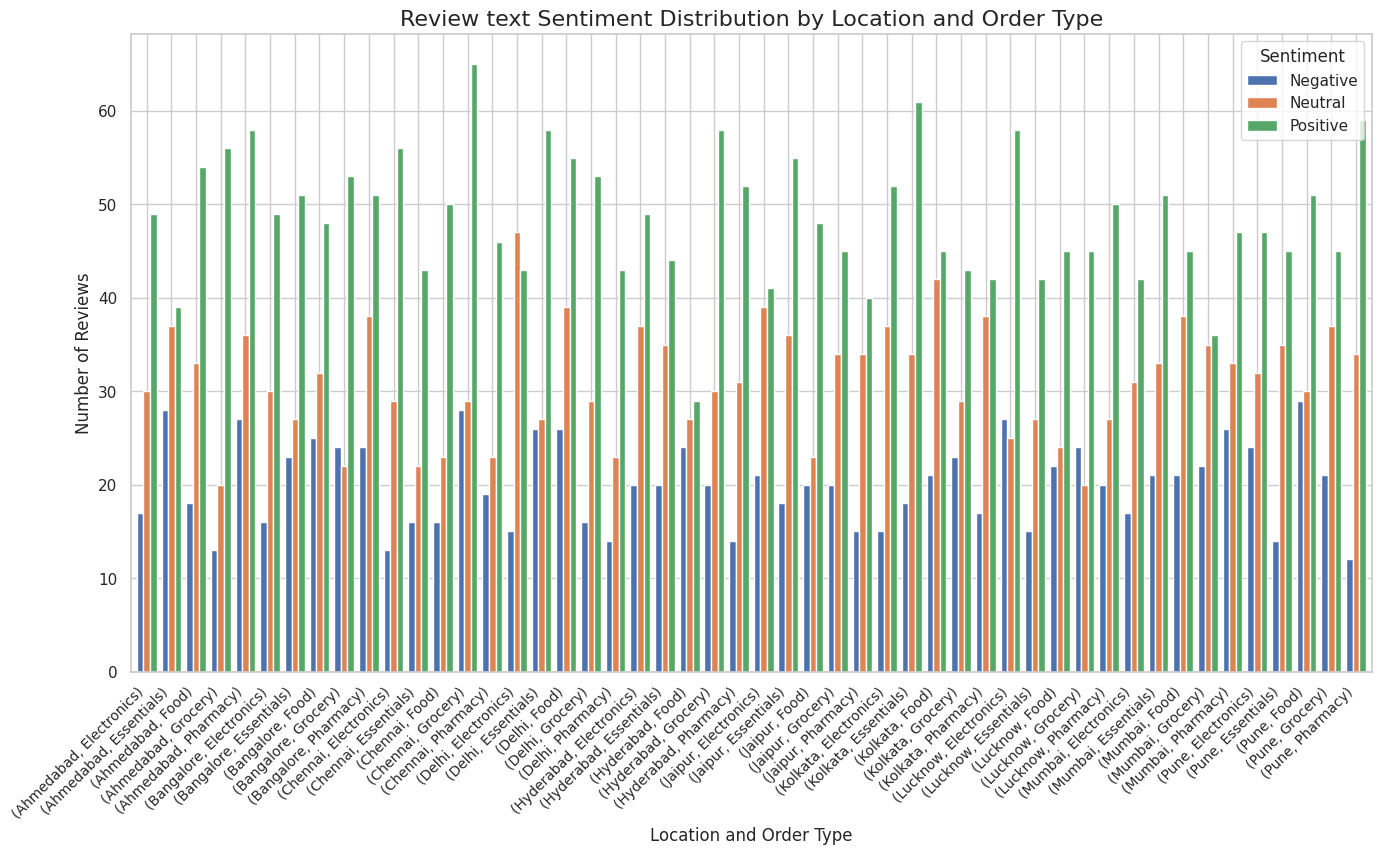

In [25]:
#3.To analyze Review text sentiment distribution by Location and Order Type

# Group by Location, Order Type, and Sentiment, and count the occurrences
sentiment_location_order = df.groupby(['Location', 'Order_Type', 'Sentiment']).size().unstack(fill_value=0)

# Reset the index to make plotting easier
sentiment_location_order = sentiment_location_order.reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a stacked bar plot to show sentiment distribution across Location and Order Type
# Adjust the bar width for better visibility
ax = sentiment_location_order.set_index(['Location', 'Order_Type']).plot(kind='bar', stacked=False, figsize=(14, 8), width=0.8)

# Customize the plot
plt.title('Review text Sentiment Distribution by Location and Order Type', fontsize=16)
plt.xlabel('Location and Order Type', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Ensure proper rotation
plt.tight_layout()  # Adjust layout for better fit
plt.subplots_adjust(bottom=0.15)  # Adds space below x-axis for labels
plt.legend(title='Sentiment', loc='upper right')
plt.show()



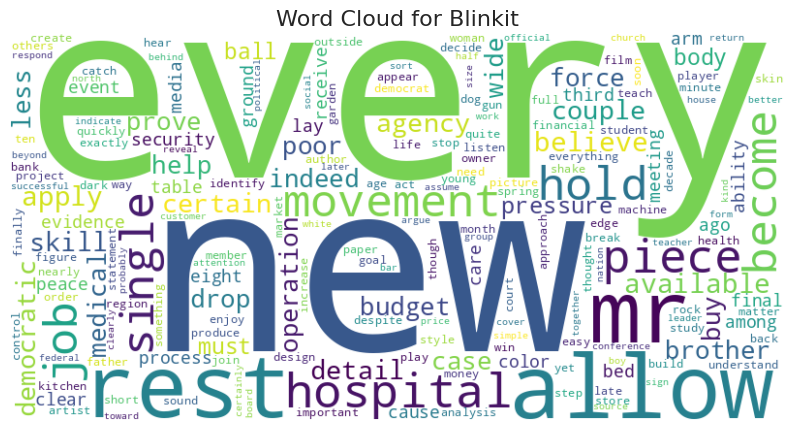

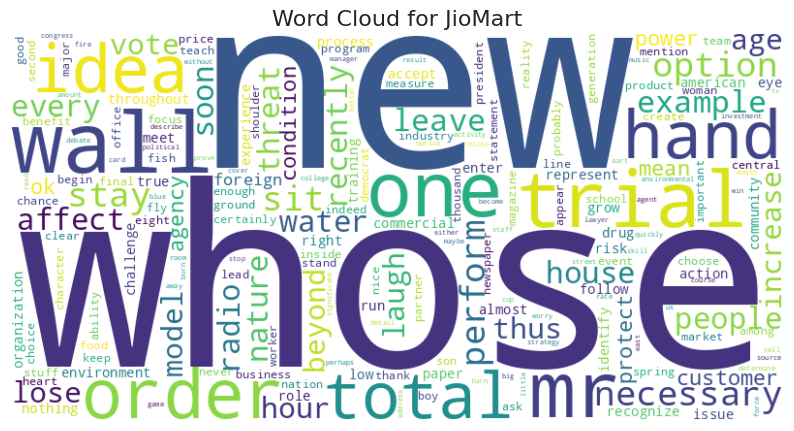

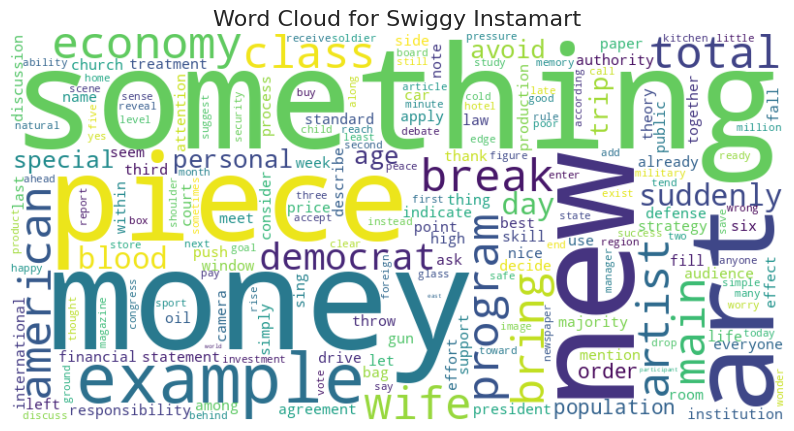

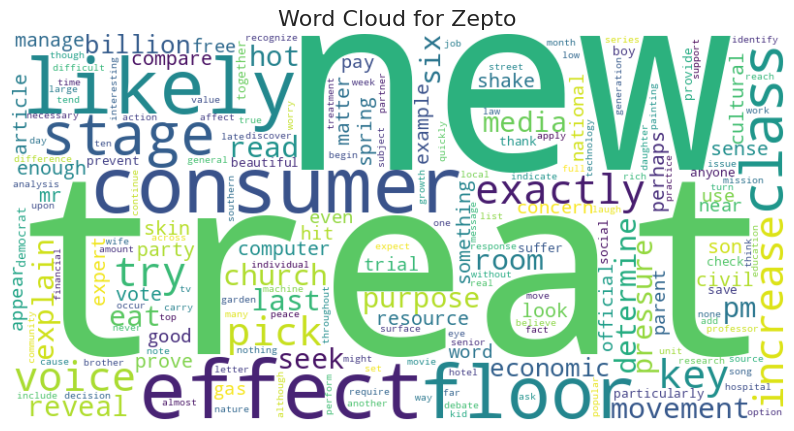

In [26]:

#4.Creating Word cloud for Agent Names

stop_words = stopwords.words('english')
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


# Apply text preprocessing to the 'Review_Text' column
df['cleaned_reviews'] = df['Review_Text'].apply(preprocess_text)

# Group reviews by Location
Agent_Name_groups = df.groupby('Agent_Name')['cleaned_reviews'].apply(' '.join)

# Create Word Cloud for each Location
for Agent_Name, reviews in Agent_Name_groups.items():
    # Generate a Word Cloud for the reviews of each Agent_Name
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)

    # Plot the Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f"Word Cloud for {Agent_Name}", fontsize=16)
    plt.show()



Agent: Zepto
Top Words: ('treat', 'effect', 'consumer', 'exactly', 'stage', 'likely', 'floor', 'movement', 'increase', 'class')
Top Frequencies: (8.785892316627502, 8.662550934310435, 7.756091998009756, 7.601551045168306, 7.5397585012958555, 7.5384003625232765, 7.368931923677672, 7.328775550081248, 7.261645063183741, 7.261546021288763)
Top 10 Keywords: treat, effect, consumer, exactly, stage, likely, floor, movement, increase, class
------------------------------


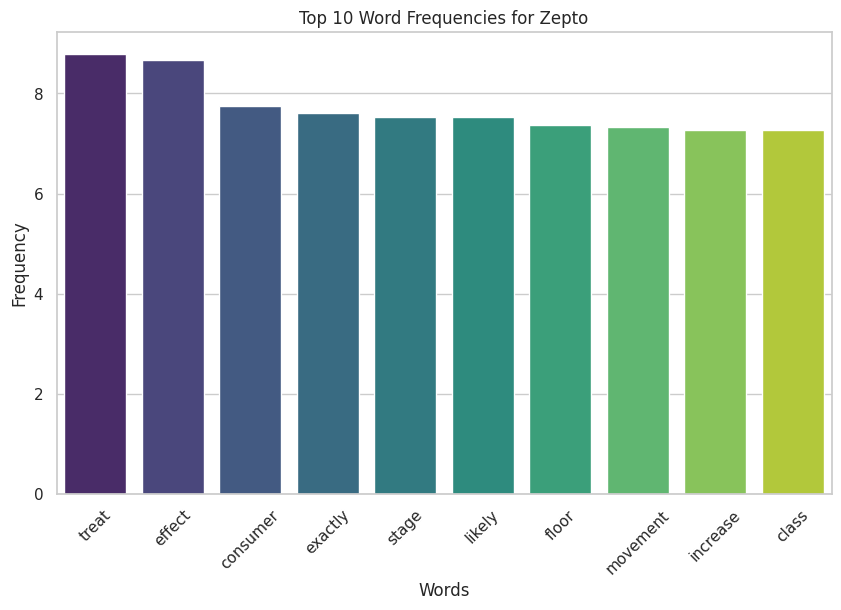

Agent: JioMart
Top Words: ('wall', 'order', 'trial', 'example', 'idea', 'mean', 'total', 'soon', 'perform', 'hand')
Top Frequencies: (7.502179847612367, 7.421625130892587, 7.3916835271189365, 6.964588503644827, 6.869444674105156, 6.837515413130638, 6.704373976394627, 6.704182873557345, 6.67689628526518, 6.639299182827576)
Top 10 Keywords: wall, order, trial, example, idea, mean, total, soon, perform, hand
------------------------------


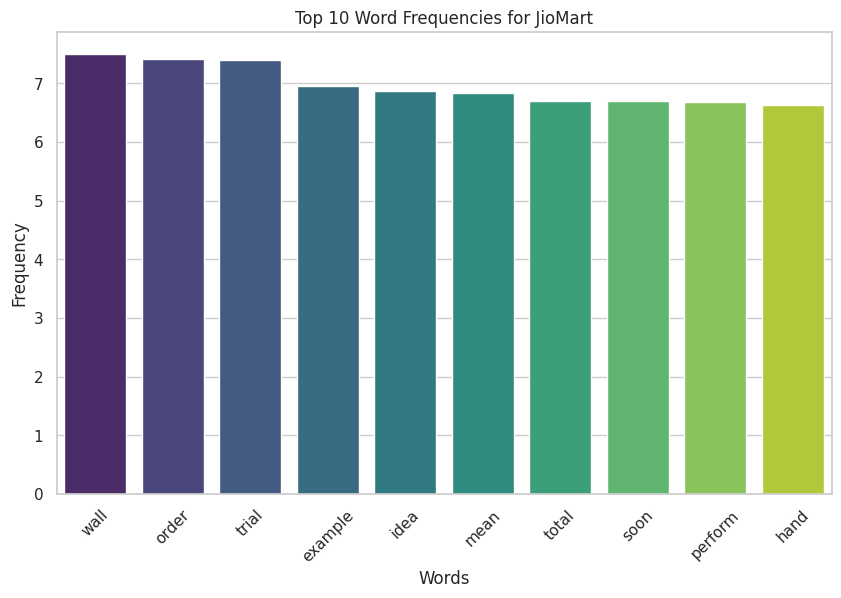

Agent: Blinkit
Top Words: ('allow', 'rest', 'hold', 'apply', 'piece', 'hospital', 'couple', 'democratic', 'single', 'movement')
Top Frequencies: (8.447563500699433, 7.978938894153405, 7.71481364202295, 7.613774732343066, 7.604743152774208, 7.571552835161383, 7.412037605081783, 7.235139837077635, 7.23424141604193, 7.220317741777525)
Top 10 Keywords: allow, rest, hold, apply, piece, hospital, couple, democratic, single, movement
------------------------------


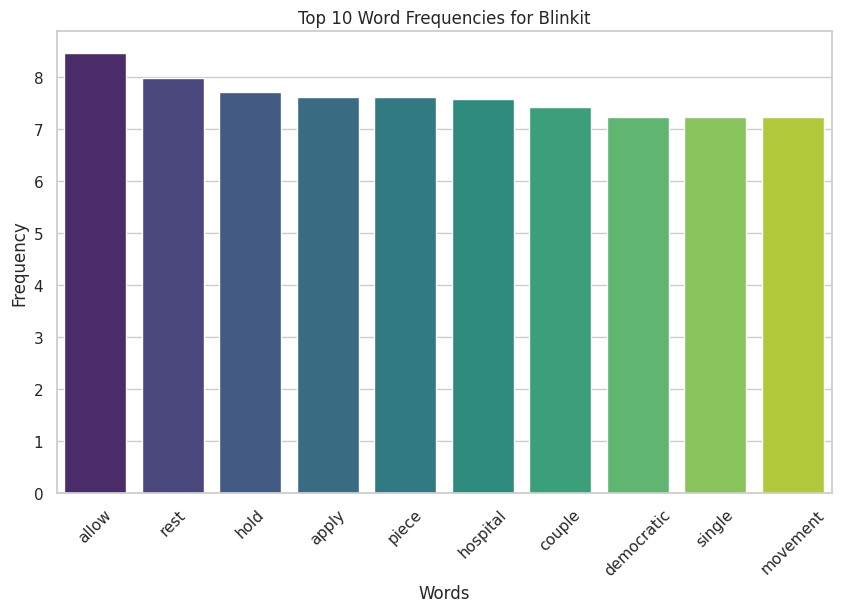

Agent: Swiggy Instamart
Top Words: ('money', 'piece', 'art', 'example', 'economy', 'wife', 'just', 'artist', 'american', 'main')
Top Frequencies: (8.049672503157126, 7.631388112421099, 7.465360205144309, 7.405135224391732, 6.903937298669407, 6.853037609206165, 6.851676050779049, 6.807035799473718, 6.716946475129311, 6.649911501081387)
Top 10 Keywords: money, piece, art, example, economy, wife, just, artist, american, main
------------------------------


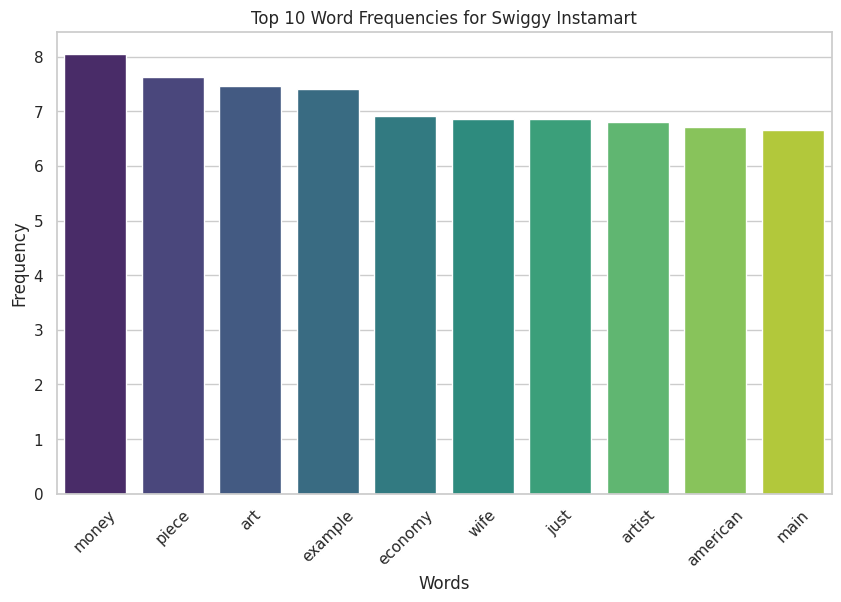

In [27]:
#5. Agent wise key word extaraction

# Function to extract top keywords and their frequencies by group (Agent)
def extract_keywords_by_group(df, group_col, text_col):
    group_keywords = {}
    for group in df[group_col].unique():
        # Get reviews for each agent
        group_data = df[df[group_col] == group]
        
        if group_data.empty:  # Check if there are no reviews for the agent
            group_keywords[group] = {}
            continue
        
        # Use TfidfVectorizer to extract keywords for the agent
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(group_data[text_col])
        feature_names = vectorizer.get_feature_names_out()
        summed_tfidf = tfidf_matrix.sum(axis=0).A1
        word_freq = {feature_names[i]: summed_tfidf[i] for i in range(len(feature_names))}
        group_keywords[group] = word_freq
    return group_keywords

# Extract agent-wise keyword frequencies
agent_keywords = extract_keywords_by_group(df, 'Agent_Name', 'Review_Text')

# Output the results agent-wise, printing on separate lines
for agent, word_freq in agent_keywords.items():
    print(f"Agent: {agent}")
    
    # Sort keywords by frequency (descending)
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # Ensure that there are top words and frequencies to extract
    if sorted_word_freq:
        top_words, top_freq = zip(*sorted_word_freq[:10])  # Extract top 10 keywords
        
        # Debugging: Check the structure of top_words and top_freq
        print("Top Words:", top_words)
        print("Top Frequencies:", top_freq)
        
        # Ensure both top_words and top_freq are valid lists
        if isinstance(top_words, tuple) and isinstance(top_freq, tuple):
            top_words = list(top_words)
            top_freq = list(top_freq)
        
        # Printing the top keywords
        print(f"Top 10 Keywords: {', '.join(top_words)}")
        print("-" * 30)  # Separator for readability

        # Plotting bar graph for each agent
        if top_words and top_freq:  # Only plot if there are words and frequencies
            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_words, y=top_freq, palette='viridis')
            plt.title(f"Top 10 Word Frequencies for {agent}")
            plt.xlabel('Words')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"No valid words to display for agent {agent}.")
    else:
        print(f"No keywords found for agent {agent}.")